# PEARSON'S CHI-SQUARED TESTS
## Introduction

A Pearson's chi-squared test $\chi^{2}$ evaluates how likely it is that observed difference between sets of categorical data arose by chance. Its null hypothesis states that the frequency distribution of events observed in a sample is consistent with a particular theoretical distribution. The events considered must be mutually exclusive and have total probability 1, like the outcomes of a categorical variable. 

A simple example is the hypothesis that an ordinary six-sided die is "fair" (i. e., all six outcomes are equally likely to occur.)


## Types of Chi-Squared tests

Pearson's chi-squared test is used to assess three types of comparison: goodness of fit, homogeneity, and independence.

+ goodness of fit: compares an observed frequency distribution to a theoretical distribution.
+ homogeneity: compares the frequency distribution of two or more groups.
+ independence: tests whether the frequency distribution depends on another trait of the sampled population.

_Note: in practice, tests of homogeneity and independence are handled in exactly the same way._

## Test Statistic

All chi-squared tests use the same test statistic $\chi^2$. It compares observed counts $O_i$ and expected counts $E_i$ (counts we expect to see if the null hypothesis is true), with $K$ the total number of categories:

$$\chi^2 = \sum_{i=1}^{K} \frac{(O_i - E_i)^2}{E_i}$$

For large samples, we can apply a multivariate normal approximation to the multinomial distribution of $O_i$; this is a generalization of the normal approximation that we applied to the binomial distribution in the chapter about population proportion inference.

The sum of their squares follow a $\chi^2$ distribution, whose degrees of freedom depend on the test:
+ goodness of fit: the sum of counts of the variable equals the samples size, so it is constrained. It has $K-1$ degrees of freedom.
+ homogeneity and independence: the sum of counts of both variables equal the sample size, so each variable is constrained. It has $(K_1-1)(K_2-1)$ degrees of freedom.


## Assumptions

In order for the conclusion of a $\chi^2$ test to hold, several assumptions must be met:
+ sufficiently large sample size, for the normal approximation to hold.
+ counts sufficiently large for each cell of the test table: at least 5 for 80% of the cells, and no cell with zero expected count. Yates's correction must be applied otherwise.
+ observations independent of each other.


## Chi-Square Distribution

The Chi-Square Distribution depends on its degrees of freedom:


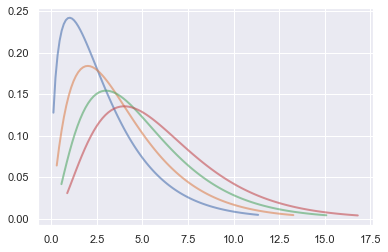

In [3]:
# modules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
sns.set()

# example of Chi-Square-distribution
fig, ax = plt.subplots(1, 1)

# degrees of freedom
for df in [3,4,5,6]:

    # 100 x points between the first and 99th percentile of the f-distribution & corresponding f values
    x = np.linspace(stats.chi2.ppf(0.01, df), stats.chi2.ppf(0.99, df), 100)
    y = stats.chi2.pdf(x, df)

    ax.plot(x, y, lw=2, alpha=0.6)


___

# CHI-SQUARED FOR GOODNESS OF FIT

This test compares an observed frequency distribution to a theoretical distribution. If the null hypothesis is true, the observed frequency distribution matches the theoritical distribution.

## Examples

In [16]:
# modules
import scipy.stats as stats

# a company has six servers. Do they fail at the same rate?
# we have 240 failures. If the null hypothesis is true, the probability of failure should be the same for all the six servers: 1/6 or 40 failures per server.

obs_failures = [46,36,52,26,42,38]
print('p-value for the chi-squared test: {:0.4f}'.format(stats.chisquare(obs_failures)[1])) # p-value is > 5%: we fail to reject the null hypothesis


p-value for the chi-squared test: 0.0752


## Binomial Test

The exact binomial test should be preferred when the variable only has two values and the sample is small (its computation becomes very expensive for large samples).


In [6]:
# modules
import scipy.stats as stats

# we get 12 heads out of 18 coin tosses. Is the coin fair?
print('p-value for the exact binomial test: {:0.3f}'.format(stats.binom_test(6, 18, p=0.5))) # p-value is > 0.05: we fail to reject the null hypothesis


p-value for the exact binomial test: 0.238


In [14]:
# modules
import scipy.stats as stats

# Are most customers of a website teenagers?
# we have a sample of 400 visitors, 58% of which are teenagers. If the null hypothesis is true, the probability of having teenagers is 50% or less.

obs_values = [232, 400 - 232]
print('p-value for the chi-squared test   : {:0.4f}'.format(stats.chisquare(obs_values)[1]))
print('p-value for the exact binomial test: {:0.4f}'.format(stats.binom_test(232, 400, p=0.5)))


p-value for the chi-squared test   : 0.0014
p-value for the exact binomial test: 0.0016


___

# CHI-SQUARED FOR INDEPENDENCE

This test compares the frequency distribution of two or more groups (homogeneity) or tests whether the frequency distribution depends on another trait of the sampled population (independence).


##  Example

Suppose there is a city of 1,000,000 residents with four neighborhoods: $A$, $B$, $C$, and $D$. A random sample of 650 residents of the city is taken and their occupation is recorded as "white collar", "blue collar", or "no collar". 

|                | $A$   | $B$   | $C$   | $D$   | **Total** |
|----------------|-------|-------|-------|-------|-----------|
|White Collar    |  90   |  60   | 104   |  95   |  **349**  |
|Blue Collar     |  30   |  50   |  51   |  20   |  **151**  |
|No Collar       |  30   |  40   |  45   |  35   |  **150**  |
|**Total**       |**150**|**150**|**200**|**150**|  **650**  |


The null hypothesis is that each person's neighborhood of residence is independent of the person's occupational classification. By the assumption of independence under the hypothesis we should "expect" the number of white-collar workers in neighborhood $A$ to be:

$WC_A = 150\times\frac{349}{650} \approx 80.54$

So the contribution of this cell to $\chi^2$ is $\frac{(90 - 80.54)^2}{80.54} \approx 1.11$

The sum of these quantities over all of the cells is the test statistic; in this case, $\approx 24.6$.  Under the null hypothesis, this sum has approximately a chi-squared distribution whose number of degrees of freedom are:

$(\text{number of rows}-1)(\text{number of columns}-1) = (3-1)(4-1) = 6$

If the test statistic is improbably large according to that chi-squared distribution, then one rejects the null hypothesis of 'independence'. In this example, the neighborhood and occupation are linked.

In [18]:
# modules
import scipy.stats as stats
import pandas as pd 

# contingency table
df = pd.DataFrame({
    'A': [ 90,30,30], 
    'B': [ 60,50,40], 
    'C': [104,51,45], 
    'D': [ 95,20,35]}, index=['White Collar', 'Blue Collar', 'No Collar']
)
display(df)

chi2, p, _, _ = stats.chi2_contingency(df)
print('Chi-Square test: {:.3} - p-value: {:.3}'.format(chi2, p)) # we reject the null hypothesis of independence


,A,B,C,D
White Collar,90,60,104,95
Blue Collar,30,50,51,20
No Collar,30,40,45,35


Chi-Square test: 24.6 - p-value: 0.00041


## Fishers's Exact Test

Fishers's Exact Test must be preferred when the sample size is small. For example, is the proportion of kids taking swimming lessons depend on their gender:
+ 247 boys. 36.8% take swimming lessons
+ 308 girls. 38.9% take swimming lessons

The null hypothesis is that the proportion of kids taking swimming lessons does not depend on their gender.


In [22]:
# contingency matrix
df = pd.DataFrame({'boys': [91, 156], 'girls': [120, 188]}, index=['Swim', 'No Swim'])
display(df)

print('p-value for the chi-squared test   : {:0.3f}'.format(stats.chi2_contingency(df)[1]))
print('p-value for the Fisher\'s exact test: {:0.3f}'.format(stats.fisher_exact(df)[1]))


,boys,girls
Swim,91,120
No Swim,156,188


p-value for the chi-squared test   : 0.672
p-value for the Fisher's exact test: 0.660
